# 금융데이터 분석을 위한 Pandas

In [1]:
# 02/26.py
data = [1, 2, 3]
new_data = [ ]

for x in data:
    new_data.append(x * 10)
    
print(new_data)

[10, 20, 30]


In [2]:
# 02/27.py
data = [1, 2, 3]
new_data = data * 10
print(new_data)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


In [4]:
# 02/28.py
'''
NumPy Array(배열) 객체의 사칙 연산
'''

import numpy as np

data = [1, 2, 3, 4, 5]
arr = np.array(data)
print(arr)
print(arr + 2)
print(arr - 2)
print(arr * 2)
print(arr / 2)

[1 2 3 4 5]
[3 4 5 6 7]
[-1  0  1  2  3]
[ 2  4  6  8 10]
[0.5 1.  1.5 2.  2.5]


In [5]:
# 02/29.py
'''
NumPy Array 끼리의 연산
고가 - 저가
'''

import numpy as np

high = [92700, 92400, 92100, 94300, 92300]
low = [90000, 91100, 91700, 92100, 90900]

arr_high = np.array(high)
arr_low = np.array(low)

arr_diff = arr_high - arr_low
print(arr_diff)

[2700 1300  400 2200 1400]


In [6]:
'''
range() vs np.arange()
'''

print(range(10))
print(np.arange(10))

range(0, 10)
[0 1 2 3 4 5 6 7 8 9]


In [7]:
'''
range() vs np.arange()
'''

for i in range(10):
    print(i, end=' ')

print()

for i in np.arange(10):
    print(i, end= ' ')

0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 

In [ ]:
# 모두의 데이터분석 with 파이썬 Unit13
'''
성능 테스트 - NumPy
'''

import matplotlib.pyplot as plt
import numpy as np
import time

start = time.time()

dice = np.random.choice(6, 1000000)

end = time.time()
print(end - start)

plt.hist(dice, bins=6)
plt.show()

12.584133386611938


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user01\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-688c13dfdbac>", line 19, in <module>
    plt.hist(dice, bins=6)
  File "C:\Users\user01\anaconda3\lib\site-packages\matplotlib\pyplot.py", line 2685, in hist
    return gca().hist(
  File "C:\Users\user01\anaconda3\lib\site-packages\matplotlib\__init__.py", line 1438, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\Users\user01\anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 6576, in hist
    x = cbook._reshape_2D(x, 'x')
  File "C:\Users\user01\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 1387, in _reshape_2D
    nd = np.ndim(xi)
  File "<__array_function__ internals>", line 4, in ndim
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call l

TypeError: object of type 'NoneType' has no len()

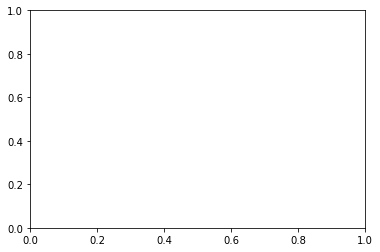

In [10]:
# 모두의 데이터분석 with 파이썬 Unit13
'''
성능 테스트 - Pure Python
'''

import matplotlib.pyplot as plt
import random
import time

start = time.time()

dice = []
for i in range(1000000):
    dice.append(random.randint(1, 6))

end = time.time()
print(end - start)

plt.hist(dice, bins=6)
plt.show()

#### Pandas 의 자료 구조
```
Series: 1차원 데이터(표의 한 행 또는 한 열 데이터)
DataFrame: 2차원 데이터(행과 열로 구성된 데이터)
```

## Series

In [12]:
# 03/01.py
'''
Series 객체 생성
'''

from pandas import Series

data = [1, 2, 3]
s = Series(data)
print(s)
print()     # 한 줄 띄우기 위한 출력
print(s * 10)

0    1
1    2
2    3
dtype: int64

0    10
1    20
2    30
dtype: int64


**List 대신 Series를 사용하는 이유**
1. 각 요소의 연산이 편리함
2. 연산 속도가 빠름

In [14]:
# 03/02.py
'''
인덱스에 레이블 붙이기
'''

from pandas import Series

data = [1000, 2000, 3000]
index = ["메로나", "구구콘", "하겐다즈"]

s = Series(data=data, index=index)
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


**시리즈 객체의 구조**

|행 번호|인덱스|데이터|
|-------|------|------|
|0|'메로나'|1000|
|1|'구구콘'|2000|
|2|'하겐다즈'|3000|

- 행 번호로 인덱싱: iloc 속성을 사용  
- 인덱스로 인덱싱: loc 속성을 사용

|행 번호|인덱스|데이터|
|-------|------|------|
|0|0|1000|
|1|1|2000|
|2|2|3000|

시리즈 객체는 인덱스를 지정하지 않으면,  
자동으로 생성된 정수 인덱스(RangeIndex 타입)를 갖습니다.

In [15]:
# 03/04.py
'''
시리즈 객체를 생성할 때 인덱스를 지정하지 않은 경우
(자동으로 정수 인덱스가 지정됨)
'''

from pandas import Series

data = [1000, 2000, 3000]
s = Series(data=data)

print(s.iloc[0])
print(s.iloc[1])
print(s.iloc[2])
print(s.iloc[-1])

1000
2000
3000
3000


In [1]:
# 03/05.py
print(s.loc[0])
print(s.loc[1])
print(s.loc[2])
print(s.loc[-1])    # 오류 발생(loc 속성은 인덱스를 사용해서 인덱싱하므로 인덱스가 아닌 값으로 인덱싱 불가)

NameError: name 's' is not defined

In [24]:
'''시리즈 값 수정'''
from pandas import Series
dadata = [1000, 2000, 3000]
index = ["메로나", "구구콘", "하겐다즈"]
s = Series(data=data, index=index)

print(s) # 원본 데이터
print()

s.loc['메로나'] = 500 # loc 속성 사용
print(s)
print()

s.iloc[0] = 500 # iloc 속성 사용
print(s)
# print()

s['메로나'] = 500 #대괄호 표기법 사용
print(s)

s.loc['비비빅'] = 500 # 값 추가
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

메로나      500
구구콘     2000
하겐다즈    3000
dtype: int64

메로나      500
구구콘     2000
하겐다즈    3000
dtype: int64
메로나      500
구구콘     2000
하겐다즈    3000
dtype: int64
메로나      500
구구콘     2000
하겐다즈    3000
비비빅      500
dtype: int64


In [30]:
'''시리즈 값 삭제'''
from pandas import Series
dadata = [1000, 2000, 3000]
index = ["메로나", "구구콘", "하겐다즈"]
s = Series(data=data, index=index)

print(s.drop('메로나')) # drop은 원본 데이터에 영향을 주지않음
a = s.drop('메로나') # 행 번호로는 삭제 불가(실수 방지를 위한 안전장치)
# b = s.drop(0)
print(s)
print("=======")
print(a)

구구콘     2000
하겐다즈    3000
dtype: int64
메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64
구구콘     2000
하겐다즈    3000
dtype: int64


In [32]:
'''같은 인덱스를 갖는 모든 데이터에 연산을 적용
(인덱스 순서가 달라도 짝지어 연산)'''

from pandas import Series

mine = Series([10,20,30], index= ['Naver',"Skt","Kt"])
wife = Series([10,30,20], index= ['Skt',"Kt","Naver"])
tot = mine + wife
print(mine)
print("=======")
print(wife)
print("=======")
print(tot)

Naver    10
Skt      20
Kt       30
dtype: int64
Skt      10
Kt       30
Naver    20
dtype: int64
Kt       60
Naver    30
Skt      30
dtype: int64


In [33]:
'''
반복문을 사용하지 않고 모든 데이터에 같은 연산이 가능
시리즈와 숫자의 연산
'''

from pandas import Series

data1 = Series([10,20,30], index= ['Naver',"Skt","Kt"])
data2 = data1 * 10
print(data2)

Naver    100
Skt      200
Kt       300
dtype: int64


In [36]:
'''
변동폭 = 고가 - 저가
시리즈와 시리즈의 연산
'''
from pandas import Series

high = Series([42800,42700,42100,48600,18900])
low = Series([32100,13200,40100,25600,11200])

diff = high - low
print(diff)

0    10700
1    29500
2     2000
3    23000
4     7700
dtype: int64


In [49]:
'''
변동폭 최대값 구하기
'''
from pandas import Series

high = Series([42800,42700,42100,48600,18900])
low = Series([32100,13200,40100,25600,11200])

diff = high - low
print(diff.max())  # 시리즈 객체의 메서드
print(max(diff))  # 파이썬 내장함수

29500
29500


In [39]:
'''시리즈의 각 데이터에 대해 비교 연산 후 불리언 값 반환'''

from pandas import Series

data =[42800,42550,41800,42650,18900]
index = ['2019-05-31','2019-05-30','2019-05-28','2019-05-21','2019-05-27']
s = Series(data = data, index = index)
cond = s >42000
print(cond)

2019-05-31     True
2019-05-30     True
2019-05-28    False
2019-05-21     True
2019-05-27    False
dtype: bool


In [40]:
from pandas import Series

data =[42800,42550,41800,42650,18900]
index = ['2019-05-31','2019-05-30','2019-05-28','2019-05-21','2019-05-27']
s = Series(data = data, index = index)
cond = s >42000
print(s[cond]) # 조건이 True인 값만 선택

2019-05-31    42800
2019-05-30    42550
2019-05-21    42650
dtype: int64


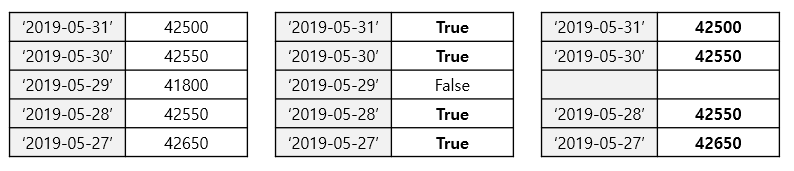

In [42]:
'''
시가와 종가를 시리즈 객체로 생성후,
종가가 시가보다 큰지 판단
'''
from pandas import Series

close = [42500, 42550, 41800, 42550, 42650]
open = [42600, 42200, 41850, 42550, 42500]
index = ['2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28', '2019-05-27']

open = Series(data=open, index=index)
close = Series(data=close, index=index)

cond = close>open
print(cond)

2019-05-31    False
2019-05-30     True
2019-05-29    False
2019-05-28    False
2019-05-27     True
dtype: bool


In [48]:
'''
시가와 종가를 시리즈 객체로 생성후,
종가가 시가보다 큰지 판단
'''
from pandas import Series

close = [42500, 42550, 41800, 42550, 42650]
open = [42600, 42200, 41850, 42550, 42500]
index = ['2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28', '2019-05-27']

open = Series(data=open, index=index)
close = Series(data=close, index=index)

cond = close>open
print(cond)
print("===="*10)
print(close[cond])
print("===="*10)
print(open[cond])


2019-05-31    False
2019-05-30     True
2019-05-29    False
2019-05-28    False
2019-05-27     True
dtype: bool
2019-05-30    42550
2019-05-27    42650
dtype: int64
2019-05-30    42200
2019-05-27    42500
dtype: int64


In [50]:
'''
시가와 종가의 변동폭 출력
'''

from pandas import Series

close = [42500, 42550, 41800, 42550, 42650]
open = [42600, 42200, 41850, 42550, 42500]
index = ['2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28', '2019-05-27']

open = Series(data=open, index=index)
close = Series(data=close, index=index)
diff = close - open

cond = close > open
print(diff[cond])

2019-05-30    350
2019-05-27    150
dtype: int64


In [52]:
'''
오름차순, 내림차순 정렬
'''
from pandas import Series

data = [3.1, 2.0, 10.1, 5.1]
index = ['000010', '000020', '000030', '000040']
s = Series(data=data, index=index)
print(s)
print("===="*10)
# 오름차순 정렬
s1 = s.sort_values()
print(s1)
print("===="*10)

s2 = s.sort_values(ascending=False)
print(s2)

000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64
000020     2.0
000010     3.1
000040     5.1
000030    10.1
dtype: float64
000030    10.1
000040     5.1
000010     3.1
000020     2.0
dtype: float64


In [53]:
'''
순위
'''

from pandas import Series

data = [3.1, 2.0, 10.1, 5.1]
index = ['000010', '000020', '000030', '000040']
s= Series(data = data, index = index)
print(s) # 원본 데이터
print("===="*10)
print(s.rank()) # 작은 값이 1위
print("===="*10)
print(s.rank(ascending = False)) # 큰 값이 1위

000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64
000010    2.0
000020    1.0
000030    4.0
000040    3.0
dtype: float64
000010    3.0
000020    4.0
000030    1.0
000040    2.0
dtype: float64


In [54]:
'''
엑셀 파일로 저장하기
'''
from pandas import Series
data =  [1000, 2000, 3000]
index = ["메로나", "구구콘", "하겐다즈"]
s = Series(data = data, index = index)
# to_excel 메서드를 사용

s.to_excel("data.xlsx")

In [76]:
'''
시리즈 인덱스 수정하기
'''
from pandas import Series
data = [3.1, 2.0, 10.1, 5.1]
index = ['000010', '000020', '000030', '000040']
s = Series(data = data, index = index)
indexs = " A" + s.index  #index에 'A'추가
s.index = indexs # indexs에 data추가
print(s)


 A000010     3.1
 A000020     2.0
 A000030    10.1
 A000040     5.1
dtype: float64


In [6]:
'''
시리즈 인덱스 수정
'''

from pandas import Series

data = [3.1, 2.0, 10.1, 5.1]
index = ['000010', '000020', '000030', '000040']
s = Series(data = data, index = index)
print(s)
print("===="*10)
print(s.index) # pandas object는 문자열
s.index = 'A' + s.index + "B"
print("===="*10)
print(s)
print("===="*10)
s.index = ['A','B',"C",'D']
print(s)


000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64
Index(['000010', '000020', '000030', '000040'], dtype='object')
A000010B     3.1
A000020B     2.0
A000030B    10.1
A000040B     5.1
dtype: float64
A     3.1
B     2.0
C    10.1
D     5.1
dtype: float64
